<a href="https://colab.research.google.com/github/KubraErensoy/MtaTurnstileData/blob/main/MTATurnstileData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd ######
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


%matplotlib inline

In [ ]:
#İmport Data ####
df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_211204.txt')
df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_211211.txt')
df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220115.txt')
df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_211225.txt')
df5 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220101.txt')
df6 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220108.txt')
df7 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220115.txt')
df8 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220122.txt')
df9 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220129.txt')
df10 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220205.txt')
df11 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220212.txt')
df12 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220219.txt')
df13 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220226.txt')
mta = pd.concat([df1, df2, df3, df4,df5,df6,df7,df8,df9,df10,df11,df12,df13])



***EXPLORING THE DATASET***

In [ ]:
mta.head(4)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/27/2021,03:00:00,REGULAR,7666542,2635798
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/27/2021,07:00:00,REGULAR,7666546,2635803
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/27/2021,11:00:00,REGULAR,7666557,2635875
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/27/2021,15:00:00,REGULAR,7666592,2635924


In [ ]:
#The total number of rows and columns in the data set
mta.shape

(2730661, 11)

In [ ]:
# '.info' Looking at Data Types in Columns and checking for nulls
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2730661 entries, 0 to 209848
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

-  Data has only object and integer values.
-  No variable column has null/missing values

In [ ]:
mta.describe()

,ENTRIES,EXITS
count,2.730661e+06,2.730661e+06
mean,4.265176e+07,3.445937e+07
std,2.228608e+08,1.969742e+08
min,0.000000e+00,0.000000e+00
25%,2.439660e+05,1.239270e+05
50%,1.356630e+06,8.681380e+05
75%,5.980373e+06,3.971979e+06
max,2.147350e+09,2.122590e+09


### ***CLEANNING AND PREPARATION DATA***




In [ ]:
# see column headings
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [ ]:
# Eliminate spaces at columns names

mta.columns = mta.columns.str.strip()
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [ ]:
#rename column headers
mta.rename(columns={'C/A'    :'ca',
                    'UNIT'    :'unit',
                    'SCP'     :'scp', 
                    'STATION' :'station',
                    'LINENAME':'linename',
                    'DIVISION':'division', 
                    'DATE'    :'date', 
                    'TIME'    :'time',
                    'DESC'    :'desc', 
                    'ENTRIES' :'entries',
                    'EXITS'   :'exits'
                    },inplace=True)

In [ ]:
mta.columns

Index(['ca', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

In [ ]:
#drop fonksiyonu ile division ve linename sütünlarını çıkardık
mta=mta.drop(["division","linename"],axis=1)#axis= 1 sütun manasında
mta.head(2)

,ca,unit,scp,station,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,11/27/2021,03:00:00,REGULAR,7666542,2635798
1,A002,R051,02-00-00,59 ST,11/27/2021,07:00:00,REGULAR,7666546,2635803


In [ ]:
# Create a datetime column with datetime object
# Convert date data to datetime object
 

mta['datetime'] = mta["date"]+ " " + mta["time"]
mta['datetime'] = pd.to_datetime(mta['datetime'], format='%m/%d/%Y %H:%M:%S')

# Create a day column

mta['day'] = mta['datetime'].dt.day_name()


# Create turnstile column as proxy for unique identifier
mta['turnstile']= mta['station']+'-'+mta['ca']+'-'+mta['unit']+'-'+mta['scp']

mta.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2730661 entries, 0 to 209848
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   ca         object        
 1   unit       object        
 2   scp        object        
 3   station    object        
 4   date       object        
 5   time       object        
 6   desc       object        
 7   entries    int64         
 8   exits      int64         
 9   datetime   datetime64[ns]
 10  day        object        
 11  turnstile  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 270.8+ MB


### ***DATA VISUALIZATION***

In [ ]:
#Checking some columns value's counts

print("Row count based on Day ")
print(mta["day"].value_counts().sort_values(ascending=False).head(10))

Row count based on Day 
Thursday     391255
Tuesday      391243
Saturday     390414
Wednesday    390192
Monday       389515
Friday       389037
Sunday       389005
Name: day, dtype: int64


In [ ]:
def plotBar(variable,n=7):
   
    mta_=mta[variable]
    mta_count=mta_.value_counts()
    mta_count=mta_count[:n]
    plt.figure()
    plt.bar(mta_count.index,mta_count,color="green")
    plt.xticks(mta_count.index,mta_count.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frekans",fontweight="bold")
    plt.title("Data Frequency - {}".format(variable),fontweight="bold")
    plt.show()
    print("{}:\n {}".format(variable,mta_count))

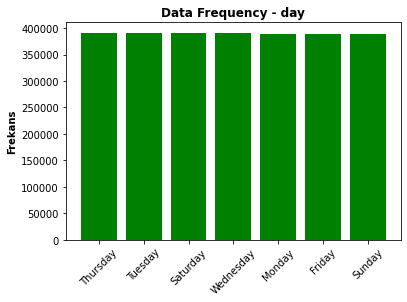

day:
 Thursday     391255
Tuesday      391243
Saturday     390414
Wednesday    390192
Monday       389515
Friday       389037
Sunday       389005
Name: day, dtype: int64


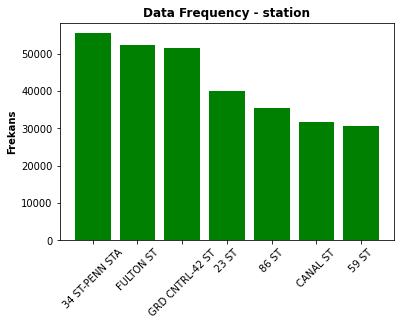

station:
 34 ST-PENN STA     55487
FULTON ST          52307
GRD CNTRL-42 ST    51487
23 ST              39911
86 ST              35539
CANAL ST           31680
59 ST              30593
Name: station, dtype: int64


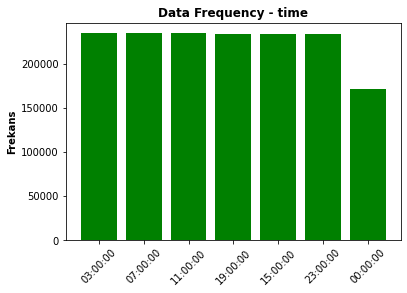

time:
 03:00:00    234119
07:00:00    234010
11:00:00    233985
19:00:00    233942
15:00:00    233937
23:00:00    233913
00:00:00    171520
Name: time, dtype: int64


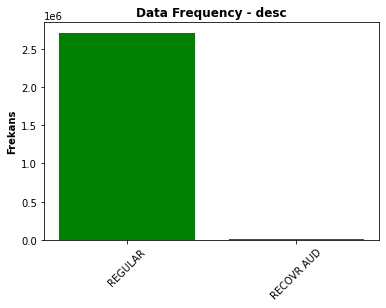

desc:
 REGULAR       2715960
RECOVR AUD      14701
Name: desc, dtype: int64


In [ ]:
categorical_variable=["day","station","time","desc"]
for i in categorical_variable:
    plotBar(i)

In [ ]:
turnstiles_daily = (mta.groupby(["ca", "unit", "scp", "station", "date","day","time"],as_index=False).entries.first())
turnstiles_daily.head(2)

,ca,unit,scp,station,date,day,time,entries
0,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,03:00:00,7675872
1,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,07:00:00,7675876


In [ ]:
#Calculate the daily entries by using each day's entries to minus the previous date
turnstiles_daily[['date_prev', 'entries_prev']] = turnstiles_daily.groupby(['ca','unit','scp','station'])['date','entries'].shift(1)

#dropping top row of NaN's:
turnstiles_daily.dropna(subset=["date_prev"], axis=0, inplace=True)

# Where is the counter going the wrong way?
turnstiles_daily[turnstiles_daily["entries"] < turnstiles_daily["entries_prev"]].head()

# Fixing counter
def get_daily_counts(df, max_counter = 1500000):
    counter = df["entries_prev"] - df["entries"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        return 0
    return counter


# finally adding our daily entries column!
turnstiles_daily["daily_entries"] = turnstiles_daily.apply(get_daily_counts, axis = 1,max_counter=40000)

turnstiles_daily.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,ca,unit,scp,station,date,day,time,entries,date_prev,entries_prev,daily_entries
1,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,07:00:00,7675876,01/01/2022,7675872.0,4.0
2,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,11:00:00,7675887,01/01/2022,7675876.0,11.0
3,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,15:00:00,7675895,01/01/2022,7675887.0,8.0
4,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,19:00:00,7675920,01/01/2022,7675895.0,25.0
5,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,23:00:00,7675936,01/01/2022,7675920.0,16.0


In [ ]:
# Visualize the median of daily entries to obsevve the patterns of this metric

turnstiles_daily_copy = turnstiles_daily.groupby("date")["daily_entries"].median().reset_index()

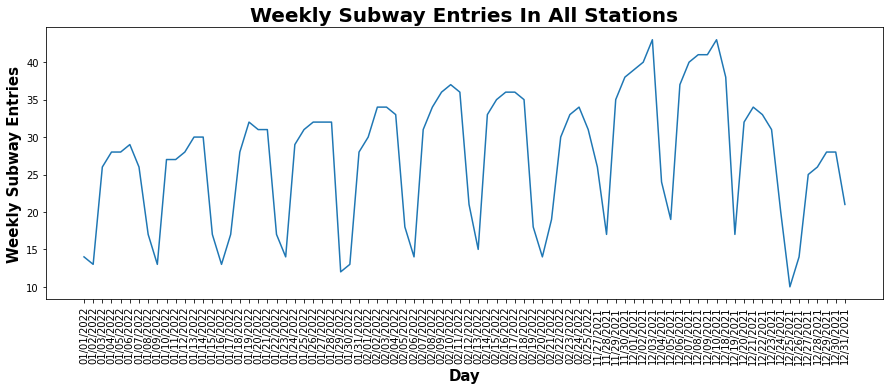

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(turnstiles_daily_copy.date, turnstiles_daily_copy.daily_entries)

plt.title("Weekly Subway Entries In All Stations",weight="bold",c="black",fontsize=20)
plt.xlabel("Day",weight="bold",c="black",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Weekly Subway Entries",weight="bold",c="black",fontsize=15);

In [ ]:
# Avarage of the morning interval
turnstiles_daily[(turnstiles_daily["unit"]=="R293") & (turnstiles_daily["time"]> "06:00:00") & (turnstiles_daily["time"]< "15:00:00")]["daily_entries"].mean()


131.74148345010872

In [ ]:
#Avarage of evening interval
turnstiles_daily[(turnstiles_daily["unit"]=="R293") & (turnstiles_daily["time"]> "16:00:00") & (turnstiles_daily["time"]< "23:59:00")]["daily_entries"].mean()


115.51158819224202

In [ ]:
ca_unit_station_daily = turnstiles_daily.groupby(["ca", "unit","station", "date","day"])[['daily_entries']].sum().reset_index()
ca_unit_station_daily.head()

,ca,unit,station,date,day,daily_entries
0,A002,R051,59 ST,01/01/2022,Saturday,1354.0
1,A002,R051,59 ST,01/02/2022,Sunday,1867.0
2,A002,R051,59 ST,01/03/2022,Monday,3917.0
3,A002,R051,59 ST,01/04/2022,Tuesday,4250.0
4,A002,R051,59 ST,01/05/2022,Wednesday,4327.0


In [ ]:
station_daily = turnstiles_daily.groupby(["station","date","day"])[['daily_entries']].sum().reset_index()
station_daily.head()

,station,date,day,daily_entries
0,1 AV,01/01/2022,Saturday,2552.0
1,1 AV,01/02/2022,Sunday,3701.0
2,1 AV,01/03/2022,Monday,6844.0
3,1 AV,01/04/2022,Tuesday,7041.0
4,1 AV,01/05/2022,Wednesday,7354.0


In [ ]:
top10_stations = (station_daily.groupby(['station'])['daily_entries'].sum()
                   .reset_index()
                   .sort_values(by='daily_entries',ascending=False) 
                   .station.head(10))

In [ ]:
station_daily_top10 =station_daily[station_daily['station']
                    .isin(top10_stations)].sort_values(by = 'daily_entries', ascending = False)

Text(0.5, 1.0, '10 Busiest Subway Stations')

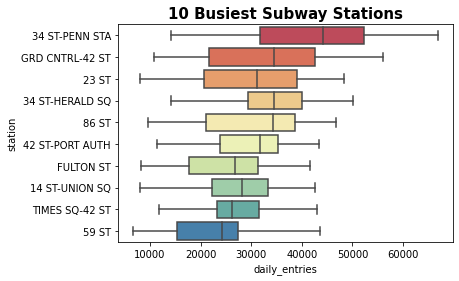

In [ ]:
sns.boxplot(x='daily_entries', y='station', data=station_daily_top10, 
            order = top10_stations,palette="Spectral",
            showfliers = False).set_title('10 Busiest Subway Stations',
                                          size = 15,fontweight="bold")

In [ ]:
print("Row count based on Day ")
print(station_daily_top10["station"].value_counts().sort_values(ascending=False).head(10))

Row count based on Day 
34 ST-PENN STA     84
23 ST              84
GRD CNTRL-42 ST    84
FULTON ST          84
86 ST              84
59 ST              84
TIMES SQ-42 ST     84
34 ST-HERALD SQ    84
14 ST-UNION SQ     84
42 ST-PORT AUTH    84
Name: station, dtype: int64


**SQL**

In [ ]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
turnstiles_daily.to_sql("TD_t", con=engine)
mta_data = pd.read_sql('SELECT * FROM TD_t;', engine)
mta_data

,index,ca,unit,scp,station,date,day,time,entries,date_prev,entries_prev,daily_entries
0,1,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,07:00:00,7675876,01/01/2022,7675872.0,4.0
1,2,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,11:00:00,7675887,01/01/2022,7675876.0,11.0
2,3,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,15:00:00,7675895,01/01/2022,7675887.0,8.0
3,4,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,19:00:00,7675920,01/01/2022,7675895.0,25.0
4,5,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,23:00:00,7675936,01/01/2022,7675920.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2515822,2520855,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,Friday,04:00:00,5562,12/31/2021,5562.0,0.0
2515823,2520856,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,Friday,08:00:00,5562,12/31/2021,5562.0,0.0
2515824,2520857,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,Friday,12:00:00,5562,12/31/2021,5562.0,0.0
2515825,2520858,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,Friday,16:00:00,5562,12/31/2021,5562.0,0.0


In [ ]:
mta_dat = pd.read_sql('SELECT "ca", sum(daily_entries) FROM TD_t where station= "34 ST-PENN STA"group by "ca" order by sum(daily_entries) DESC ;', engine)
mta_dat.head(10)

,ca,sum(daily_entries)
0,R138,1308435.0
1,N067,809316.0
2,N072,529117.0
3,R141,443612.0
4,N073,329551.0
5,R135,325064.0
6,N070,290897.0
7,R142,271454.0
8,N071,265239.0
9,R139,194432.0


In [ ]:
mta_da = pd.read_sql('SELECT "unit", sum(daily_entries) FROM TD_t where station= "34 ST-PENN STA" AND "ca"="R138" order by sum(daily_entries) DESC ;', engine)
mta_da.head

<bound method NDFrame.head of    unit  sum(daily_entries)
0  R293           1308435.0>

In [ ]:
mask = ((turnstiles_daily["ca"] == "R138") & 
        (turnstiles_daily["unit"] == "R293") &
(turnstiles_daily["station"] == "34 ST-PENN STA"))

mask_table=turnstiles_daily[mask]
mask_table

,ca,unit,scp,station,date,day,time,entries,date_prev,entries_prev,daily_entries
1667448,R138,R293,00-00-00,34 ST-PENN STA,01/01/2022,Saturday,05:00:00,1423569,01/01/2022,1423530.0,39.0
1667449,R138,R293,00-00-00,34 ST-PENN STA,01/01/2022,Saturday,09:00:00,1423666,01/01/2022,1423569.0,97.0
1667450,R138,R293,00-00-00,34 ST-PENN STA,01/01/2022,Saturday,13:00:00,1423836,01/01/2022,1423666.0,170.0
1667451,R138,R293,00-00-00,34 ST-PENN STA,01/01/2022,Saturday,17:00:00,1424089,01/01/2022,1423836.0,253.0
1667452,R138,R293,00-00-00,34 ST-PENN STA,01/01/2022,Saturday,21:00:00,1424335,01/01/2022,1424089.0,246.0
...,...,...,...,...,...,...,...,...,...,...,...
1676778,R138,R293,00-06-00,34 ST-PENN STA,12/31/2021,Friday,05:00:00,7860842,12/31/2021,7860829.0,13.0
1676779,R138,R293,00-06-00,34 ST-PENN STA,12/31/2021,Friday,09:00:00,7860851,12/31/2021,7860842.0,9.0
1676780,R138,R293,00-06-00,34 ST-PENN STA,12/31/2021,Friday,13:00:00,7860874,12/31/2021,7860851.0,23.0
1676781,R138,R293,00-06-00,34 ST-PENN STA,12/31/2021,Friday,17:00:00,7860948,12/31/2021,7860874.0,74.0


In [ ]:
mask_table.to_sql("mask_tab", con=engine)

In [ ]:
mta_evn = pd.read_sql('SELECT time,daily_entries FROM mask_tab where time BETWEEN "16:00:00" AND "23:59:00" order by daily_entries Desc;', engine)

AVG_EVINING_DAILY_ENTRIES=mta_evn["daily_entries"].mean()
AVG_EVINING_DAILY_ENTRIES

119.48482892188508

In [ ]:
mta_mor = pd.read_sql('SELECT time,daily_entries FROM mask_tab where time BETWEEN "06:00:00" AND "15:00:00" order by daily_entries Desc;', engine)

AVG_MORNING_DAILY_ENTRIES=mta_mor["daily_entries"].mean()
AVG_MORNING_DAILY_ENTRIES

159.29094964945824

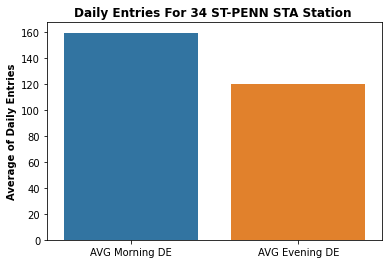

In [ ]:
x_list=['AVG Morning DE',"AVG Evening DE"]
y_list=[AVG_MORNING_DAILY_ENTRIES,AVG_EVINING_DAILY_ENTRIES]
sns.barplot(x =x_list,y=y_list);
plt.title("Daily Entries For 34 ST-PENN STA Station ",weight="bold",c="black")
plt.ylabel("Average of Daily Entries",weight="bold",c="black");


#in 34 ST-PENN STA station of Average of Morning and Evening Daily Entries

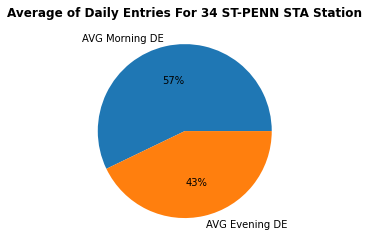

In [ ]:
colors = sns.color_palette()
plt.pie(y_list, labels = x_list, colors = colors, autopct='%.0f%%')
plt.title("Average of Daily Entries For 34 ST-PENN STA Station",weight="bold",c="black")
plt.show()

**Heatmap**

In [ ]:
# Function to get the unique DAY + DATE combination
def get_day(x):
    return f"{x.date()}_{x.day_name()}"

In [ ]:
mta['day_date'] = mta['datetime'].apply(get_day)

In [ ]:
mta_grouped = mta.groupby(['station','unit','scp','day','datetime','day_date'])['entries','exits'].agg(['max','min'])
mta_grouped.sort_values(('entries','max'),ascending=False).reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


station  unit       scp       day            datetime  \
                                                                         
0               HEWES ST  R352  00-00-00  Saturday 2021-11-27 00:00:00   
1               HEWES ST  R352  00-00-00  Saturday 2021-11-27 04:00:00   
2               HEWES ST  R352  00-00-00  Saturday 2021-11-27 08:00:00   
3               HEWES ST  R352  00-00-00  Saturday 2021-11-27 12:00:00   
4               HEWES ST  R352  00-00-00  Saturday 2021-11-27 16:00:00   
...                  ...   ...       ...       ...                 ...   
2520855     QUEENS PLAZA  R140  00-05-03    Sunday 2022-02-20 12:00:00   
2520856     QUEENS PLAZA  R140  00-05-03    Sunday 2022-02-20 16:00:00   
2520857     QUEENS PLAZA  R140  00-05-03    Sunday 2022-02-20 20:00:00   
2520858     QUEENS PLAZA  R140  00-05-03  Thursday 2021-12-02 00:00:00   
2520859  34 ST-HERALD SQ  R022  00-06-01  Saturday 2021-12-04 11:00:00   

                    day_date     entries                  exits             
                                     max         min        max        min  
0        2021-11-27_Saturday  2147350361  2147350361  671189981  671189981  
1        2021-11-27_Saturday  2147350353  2147350353  671189987  671189987  
2        2021-11-27_Saturday  2147350333  2147350333  671190000  671190000  
3        2021-11-27_Saturday  2147350285  2147350285  671190018  671190018  
4        2021-11-27_Saturday  2147350222  2147350222  671190045  671190045  
...                      ...         ...         ...        ...        ...  
2520855    2022-02-20_Sunday           0           0        625        625  
2520856    2022-02-20_Sunday           0           0        625        625  
2520857    2022-02-20_Sunday           0           0        625        625  
2520858  2021-12-02_Thursday           0           0        607        607  
2520859  2021-12-04_Saturday           0           0       3456       3456  

[2520860 rows x 10 columns]

In [ ]:
# Group the sorted data and calculate ENTRIES & EXISTS for each element to create a summary dataframe
mta_entries = mta.groupby(['station','unit','scp','day','day_date','date']).entries.max() - mta.groupby(['station','unit','scp','day','day_date','date']).entries.min()
mta_entries = mta_entries.reset_index()

mta_exits = mta.groupby(['station','unit','scp','day','day_date','date']).exits.max() - mta.groupby(['station','unit','scp','day','day_date','date']).exits.min()
mta_exits = mta_exits.reset_index()

mta_entry_exit = pd.merge(left=mta_entries,right=mta_exits,on=['station','unit','scp','day','day_date','date'])
mta_entry_exit.isnull().sum()

mta_entry_exit.columns = ['station','unit','scp','day','day_date','date','entries_diff','exits_diff']
mta_entry_exit

,station,unit,scp,day,day_date,date,entries_diff,exits_diff
0,1 AV,R248,00-00-00,Friday,2021-12-03_Friday,12/03/2021,834,3198
1,1 AV,R248,00-00-00,Friday,2021-12-10_Friday,12/10/2021,839,3191
2,1 AV,R248,00-00-00,Friday,2021-12-24_Friday,12/24/2021,268,1062
3,1 AV,R248,00-00-00,Friday,2021-12-31_Friday,12/31/2021,273,1523
4,1 AV,R248,00-00-00,Friday,2022-01-07_Friday,01/07/2022,563,2356
...,...,...,...,...,...,...,...,...
420847,ZEREGA AV,R326,00-05-01,Wednesday,2022-01-26_Wednesday,01/26/2022,0,0
420848,ZEREGA AV,R326,00-05-01,Wednesday,2022-02-02_Wednesday,02/02/2022,0,0
420849,ZEREGA AV,R326,00-05-01,Wednesday,2022-02-09_Wednesday,02/09/2022,0,0
420850,ZEREGA AV,R326,00-05-01,Wednesday,2022-02-16_Wednesday,02/16/2022,0,0


In [ ]:
mta_entry_exit['traffic'] = mta_entry_exit['entries_diff'] + mta_entry_exit['exits_diff']


In [ ]:
mta_entry_exit.sort_values('traffic',ascending=False).head(30)


,station,unit,scp,day,day_date,date,entries_diff,exits_diff,traffic
11748,125 ST,R132,00-03-01,Friday,2022-01-21_Friday,01/21/2022,2022148801,1788166358,3810315159
65979,33 ST,R176,03-06-00,Saturday,2022-01-15_Saturday,01/15/2022,1995747840,57986,1995805826
298358,JACKSON AV,R405,00-00-02,Monday,2022-02-07_Monday,02/07/2022,1520745531,116946157,1637691688
193753,BOWLING GREEN,R041,01-05-00,Wednesday,2022-02-16_Wednesday,02/16/2022,1289819893,152764416,1442584309
410498,WEST FARMS SQ,R387,00-00-03,Tuesday,2021-12-07_Tuesday,12/07/2021,680,1056964724,1056965404
372143,QUEENS PLAZA,R140,01-06-00,Tuesday,2022-01-04_Tuesday,01/04/2022,59456,805287944,805347400
202022,BURNSIDE AV,R244,00-00-01,Tuesday,2021-12-28_Tuesday,12/28/2021,284117791,133692552,417810343
21003,14 ST-UNION SQ,R170,01-00-02,Thursday,2021-12-30_Thursday,12/30/2021,17675196,10694052,28369248
181109,BEACH 60 ST,R336,00-00-01,Saturday,2021-12-04_Saturday,12/04/2021,12553650,14133876,26687526
109097,52 ST,R327,00-00-01,Tuesday,2021-12-21_Tuesday,12/21/2021,9261272,4935931,14197203


### **DETECTING & TREATING OUTLIERS**

In [ ]:
mta_entry_exit['traffic'].describe()

count    4.208520e+05
mean     2.775463e+04
std      7.739272e+06
min      0.000000e+00
25%      2.180000e+02
50%      5.820000e+02
75%      1.115000e+03
max      3.810315e+09
Name: traffic, dtype: float64

In [ ]:
mta_entry_exit.drop(mta_entry_exit[mta_entry_exit['traffic'] > 10000].index, inplace=True)
mta_entry_exit.drop(mta_entry_exit[mta_entry_exit['traffic'] == 0].index, inplace=True)

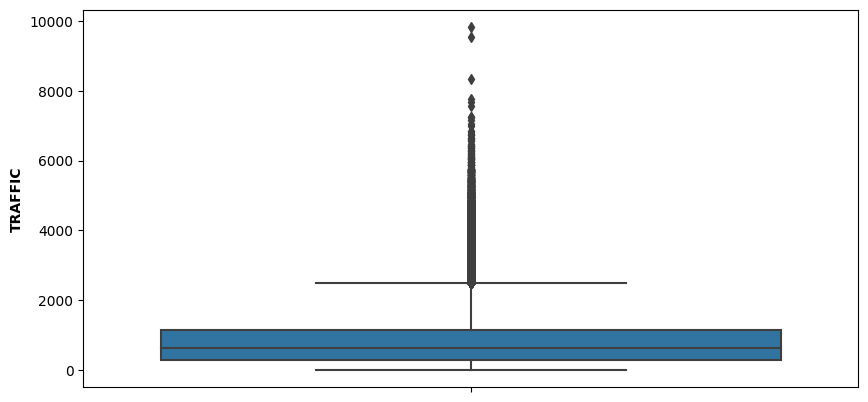

In [ ]:
plt.figure(figsize=[10,5], dpi=100)
ax = sns.boxplot(y=mta_entry_exit["traffic"])
plt.ylabel("TRAFFIC",fontsize=10,fontweight="bold")
plt.show()

In [ ]:
mta_entry_exit['traffic'].quantile(0.9)

1801.0

In [ ]:

mta_entry_exit.drop(mta_entry_exit[mta_entry_exit['traffic'] > 1801].index, inplace=True)


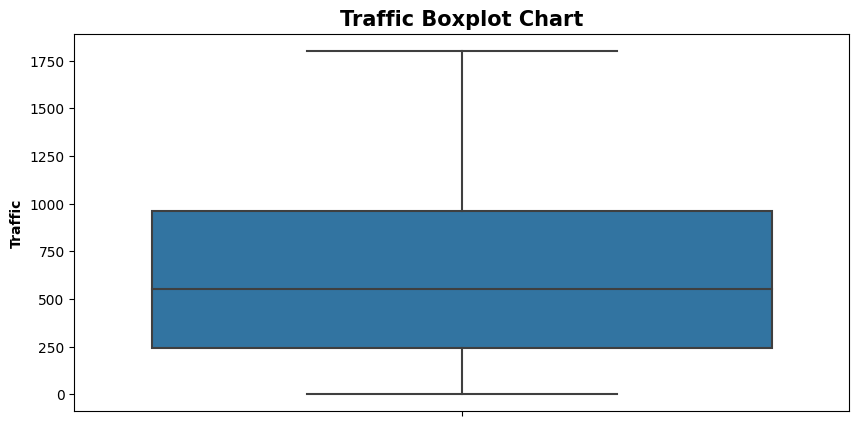

In [ ]:
plt.figure(figsize=[10,5], dpi=100)
ax = sns.boxplot(y=mta_entry_exit["traffic"])
plt.ylabel("Traffic",fontsize=10,fontweight="bold")
plt.title("Traffic Boxplot Chart",fontsize=15,fontweight="bold")
plt.show()



In [ ]:
mta_top_10 = mta_entry_exit.groupby('station').sum().sort_values('traffic', ascending=False).head(10)
mta_top_10 = mta_top_10.reset_index()
print(mta_top_10)   

           station  entries_diff  exits_diff  traffic
0   34 ST-PENN STA       2546093     3247623  5793716
1        FULTON ST       1755699     2304948  4060647
2            23 ST       1856457     2155682  4012139
3  GRD CNTRL-42 ST       1501829     2014264  3516093
4            86 ST       1554984     1545020  3100004
5            59 ST       1337247     1762344  3099591
6   TIMES SQ-42 ST       1279447     1748443  3027890
7         CANAL ST       1270773     1739055  3009828
8  34 ST-HERALD SQ       1239951     1581133  2821084
9            14 ST       1012569     1564157  2576726


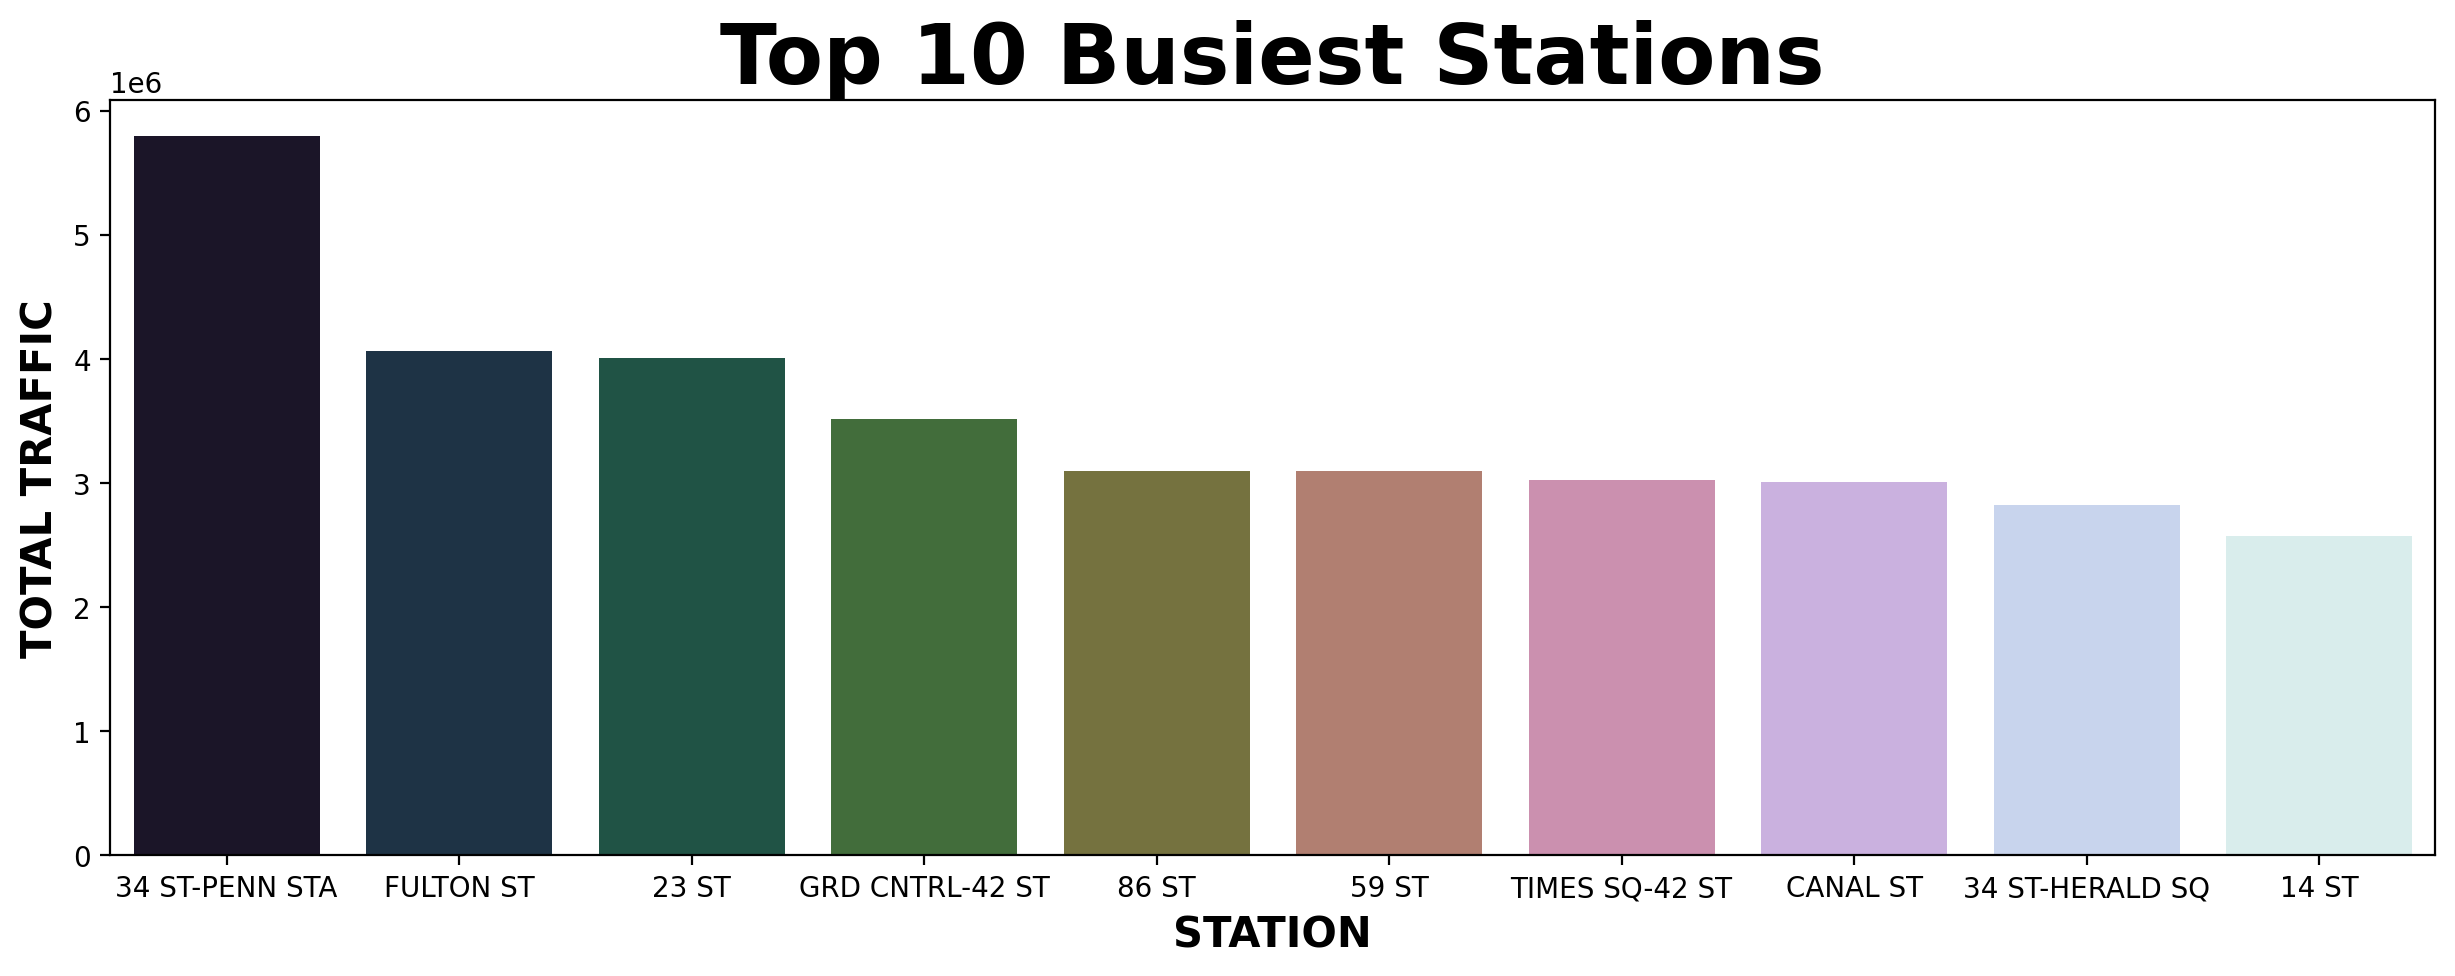

In [ ]:
plt.figure(figsize=[15,5], dpi=200)
ax = sns.barplot(x = 'station',y = 'traffic',data = mta_top_10,palette=("cubehelix")
)
plt.title('Top 10 Busiest Stations', weight="bold", fontsize=30)
plt.ylabel('TOTAL TRAFFIC',fontsize=15,fontweight="bold")
plt.xlabel('STATION',fontsize=15,fontweight="bold")
#ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
mta_top_days = mta_entry_exit.groupby(['day']).sum().sort_values(['traffic'], ascending=False)
mta_top_days = mta_top_days.reset_index()
mta_top_days

,day,entries_diff,exits_diff,traffic
0,Tuesday,17777217,18142107,35919324
1,Thursday,17814659,18078922,35893581
2,Wednesday,17778153,18048601,35826754
3,Monday,16960559,17759448,34720007
4,Friday,16793669,17660480,34454149
5,Saturday,11322878,14532971,25855849
6,Sunday,10385799,13767268,24153067


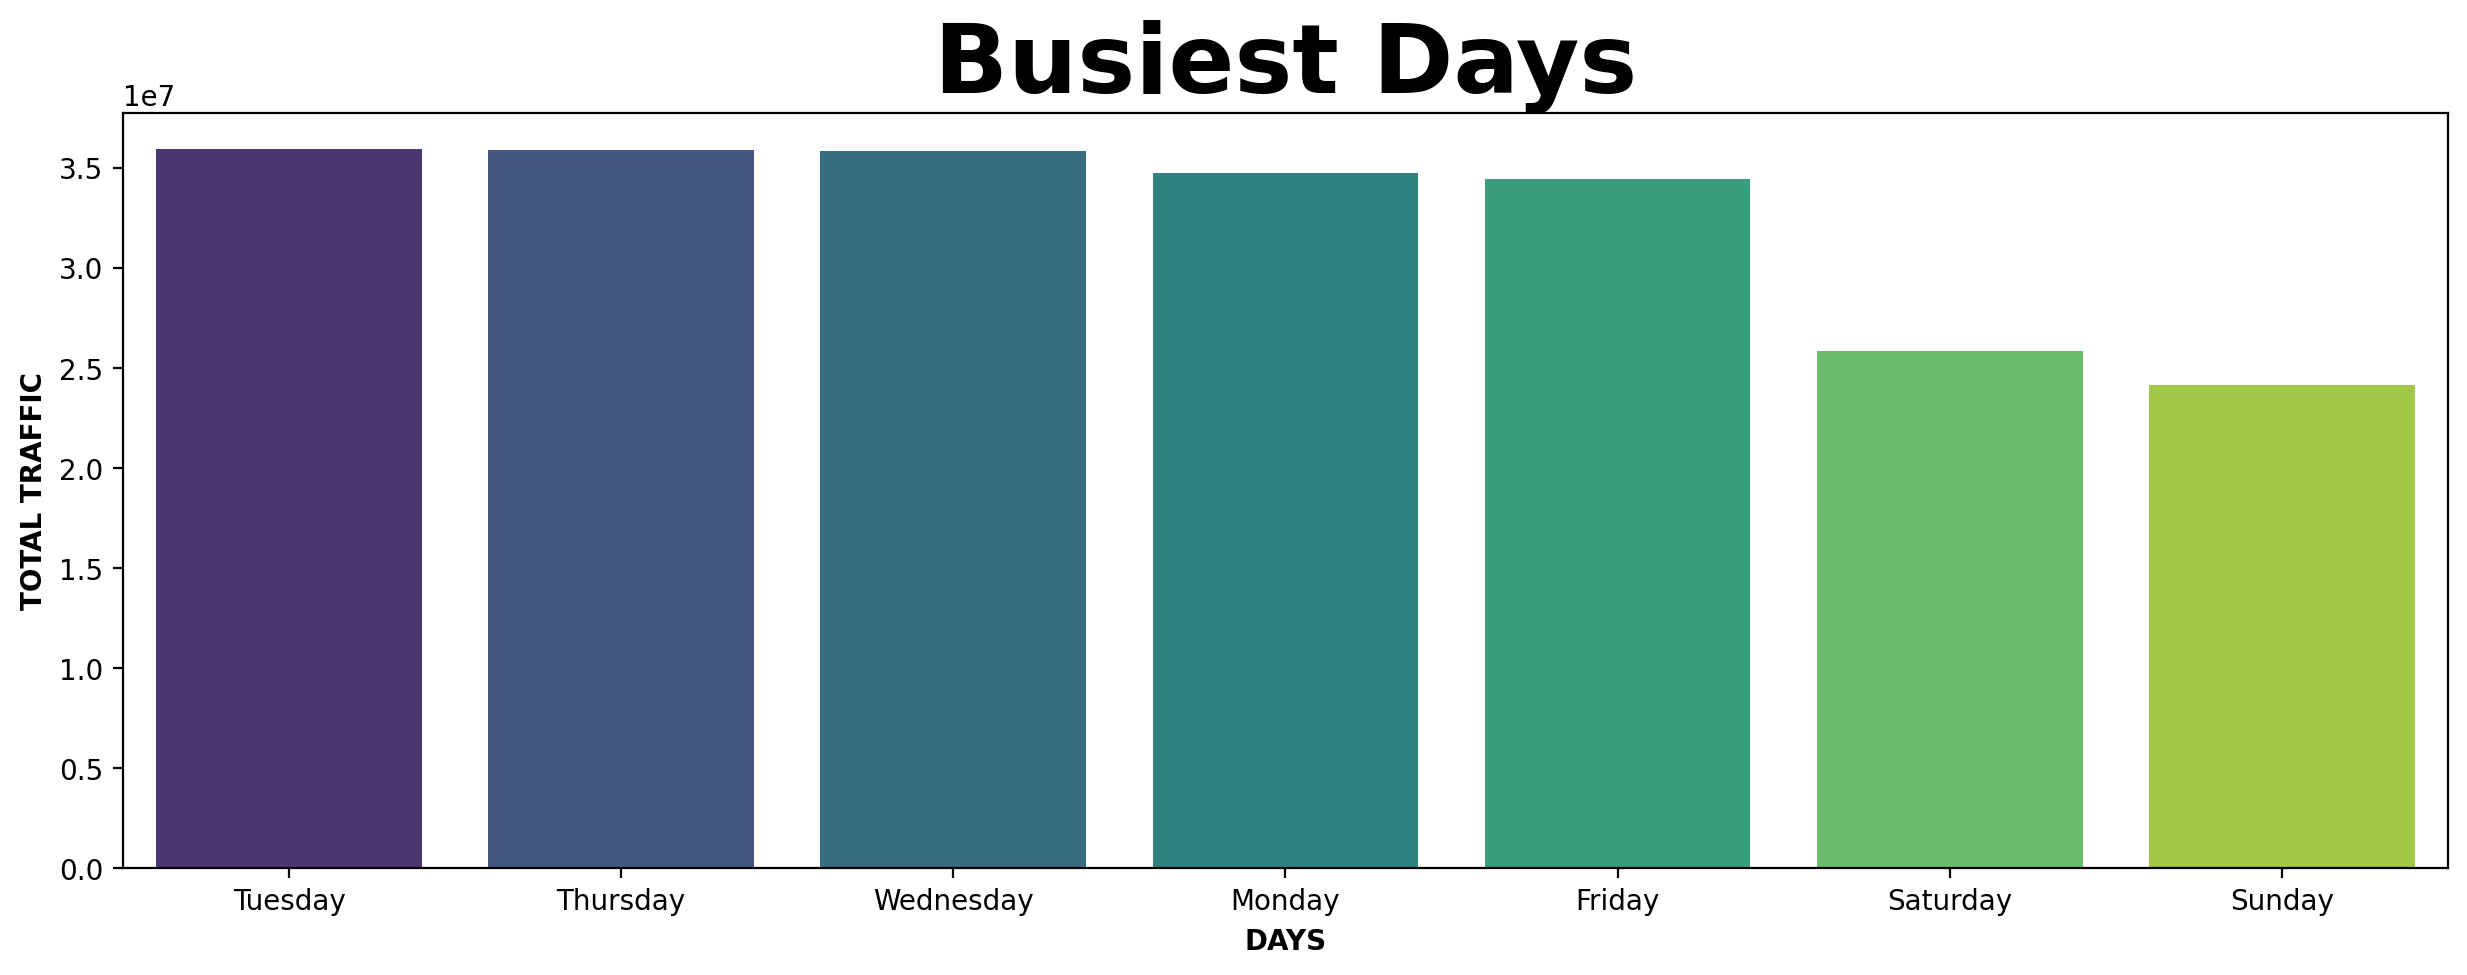

In [ ]:
plt.figure(figsize=[15,5], dpi=200)
ax = sns.barplot(x = 'day',y = 'traffic',data = mta_top_days,palette=("viridis"))
plt.title('Busiest Days', weight="bold", fontsize=35)
plt.ylabel('TOTAL TRAFFIC',fontsize=10,fontweight="bold")
plt.xlabel('DAYS',fontsize=10,fontweight="bold")
plt.show()


In [ ]:
top_10_stations = [] 
for ind in mta_top_10.index:
    top_10_stations.append(mta_top_10['station'][ind])

In [ ]:
mta_top_stations_by_day = mta_entry_exit[mta_entry_exit.station.isin(top_10_stations)]
mta_top_stations_by_day = mta_top_stations_by_day.groupby(['day','station']).sum().sort_values('traffic',ascending=False)
mta_top_stations_by_day = mta_top_stations_by_day.reset_index()

mta_top_stations_by_day

,day,station,entries_diff,exits_diff,traffic
0,Tuesday,34 ST-PENN STA,424430,499863,924293
1,Wednesday,34 ST-PENN STA,420156,496794,916950
2,Thursday,34 ST-PENN STA,417195,495869,913064
3,Friday,34 ST-PENN STA,386036,498193,884229
4,Monday,34 ST-PENN STA,389420,469228,858648
...,...,...,...,...,...
65,Sunday,FULTON ST,132900,210325,343225
66,Sunday,CANAL ST,134384,202130,336514
67,Sunday,59 ST,126485,197681,324166
68,Saturday,14 ST,111259,205863,317122


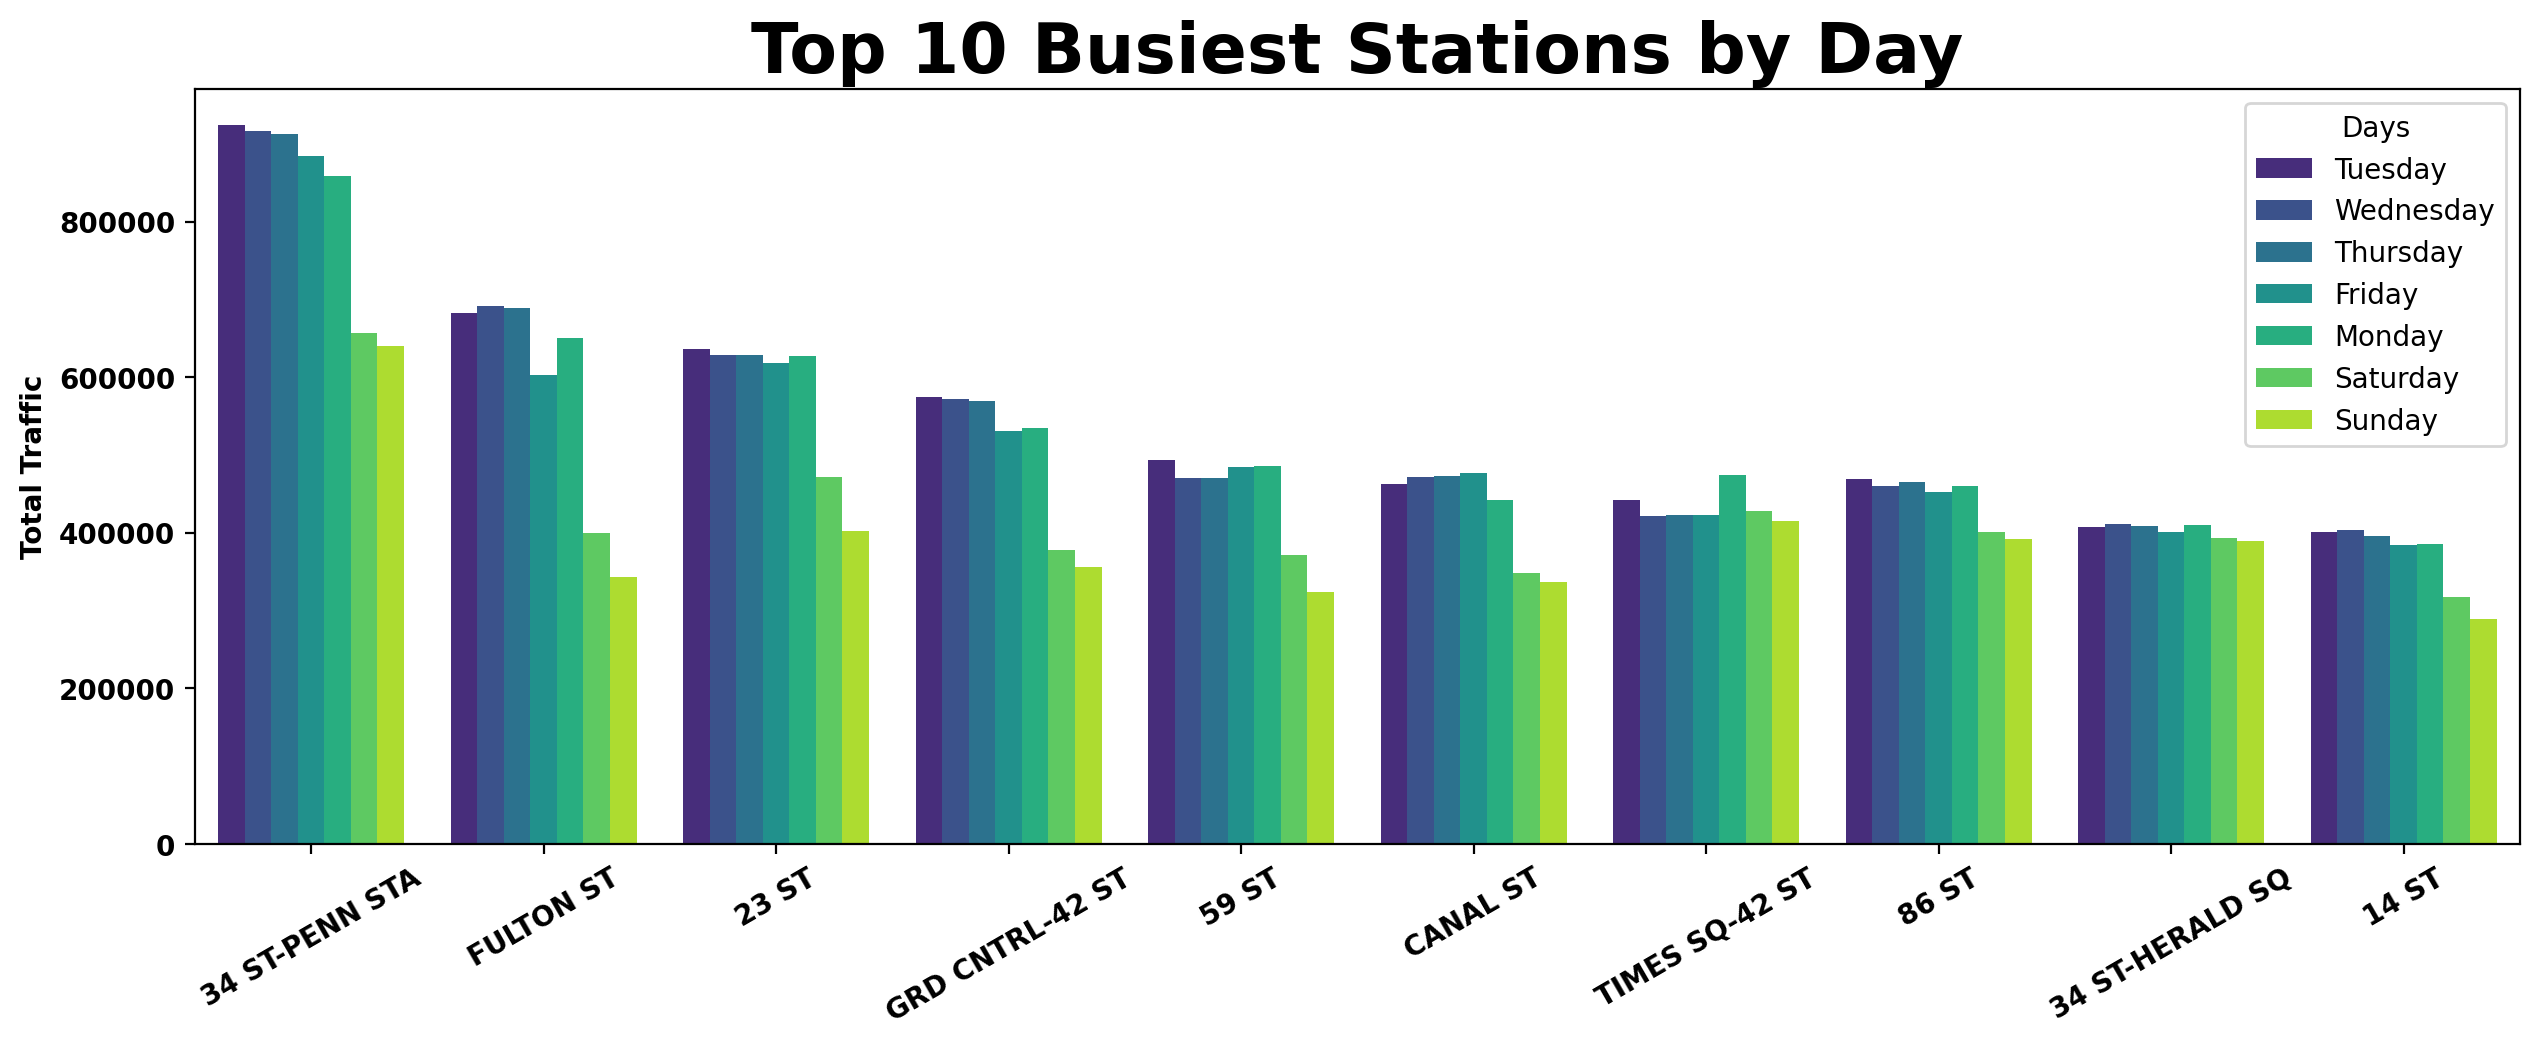

In [ ]:
plt.figure(figsize=[15,5], dpi=200)
ax = sns.barplot(x="station", y="traffic", hue="day",data=mta_top_stations_by_day, saturation=1,palette=("viridis"))
plt.title("Top 10 Busiest Stations by Day", weight="bold", fontsize=25)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=30, weight="bold")
plt.ylabel("Total Traffic",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.legend(title="Days")
plt.show()

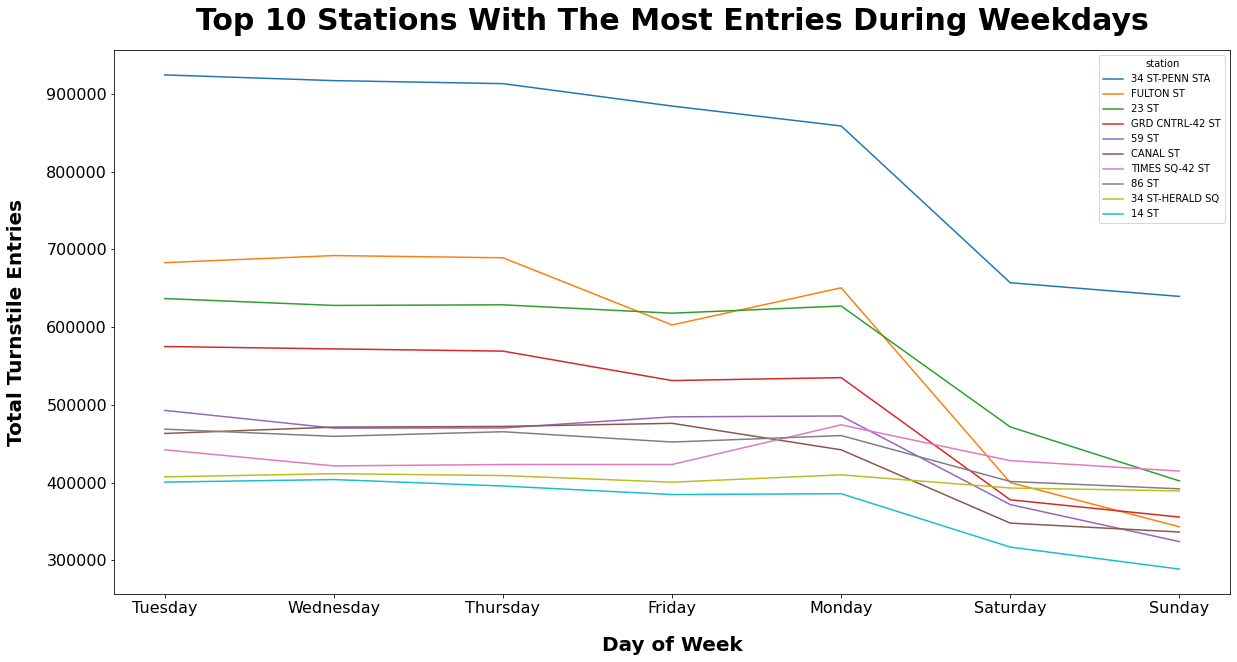

In [ ]:
fig, axs = plt.subplots(figsize=[20, 10])

line_weekday_entries = sns.lineplot(x = "day",
                                     y = "traffic",
                                     hue = "station",
                                     data = mta_top_stations_by_day)

line_weekday_entries.set_title("Top 10 Stations With The Most Entries During Weekdays",
                             
                             fontsize=30,
                             fontweight='bold',
                             pad=20)

line_weekday_entries.set_ylabel("Total Turnstile Entries", 
                                 
                                 fontsize=20,
                                 fontweight='bold', 
                                 labelpad=20)
line_weekday_entries.set_xlabel("Day of Week", 

                                 fontsize=20,
                                 fontweight='bold',
                                 labelpad=20)
line_weekday_entries.tick_params(labelsize=16)


In [ ]:
#Creating Pivot table for heatmap

mta_top10_heatmap = mta_top_stations_by_day.groupby(["station","day"]).traffic.mean().reset_index()

mta_top10_heatmap = mta_top10_heatmap.pivot("day","station","traffic")

mta_top10_heatmap = mta_top10_heatmap.reindex(index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

mta_top10_heatmap

#Daily total traffic for top 10 stations in New York

station,14 ST,23 ST,34 ST-HERALD SQ,34 ST-PENN STA,59 ST,86 ST,CANAL ST,FULTON ST,GRD CNTRL-42 ST,TIMES SQ-42 ST
day,,,,,,,,,,
Monday,385773.0,627110.0,410023.0,858648.0,485711.0,460535.0,442192.0,650531.0,535048.0,474308.0
Tuesday,400705.0,636706.0,407422.0,924293.0,492904.0,468757.0,463213.0,682888.0,575044.0,442220.0
Wednesday,403960.0,627868.0,411502.0,916950.0,470116.0,459521.0,471374.0,691979.0,571962.0,421516.0
Thursday,395660.0,628653.0,409088.0,913064.0,470323.0,465458.0,472304.0,689153.0,569111.0,423289.0
Friday,384676.0,617891.0,400594.0,884229.0,484609.0,452197.0,476276.0,602777.0,531263.0,423341.0
Saturday,317122.0,471669.0,393083.0,657040.0,371762.0,401513.0,347955.0,400094.0,377936.0,428329.0
Sunday,288830.0,402242.0,389372.0,639492.0,324166.0,392023.0,336514.0,343225.0,355729.0,414887.0


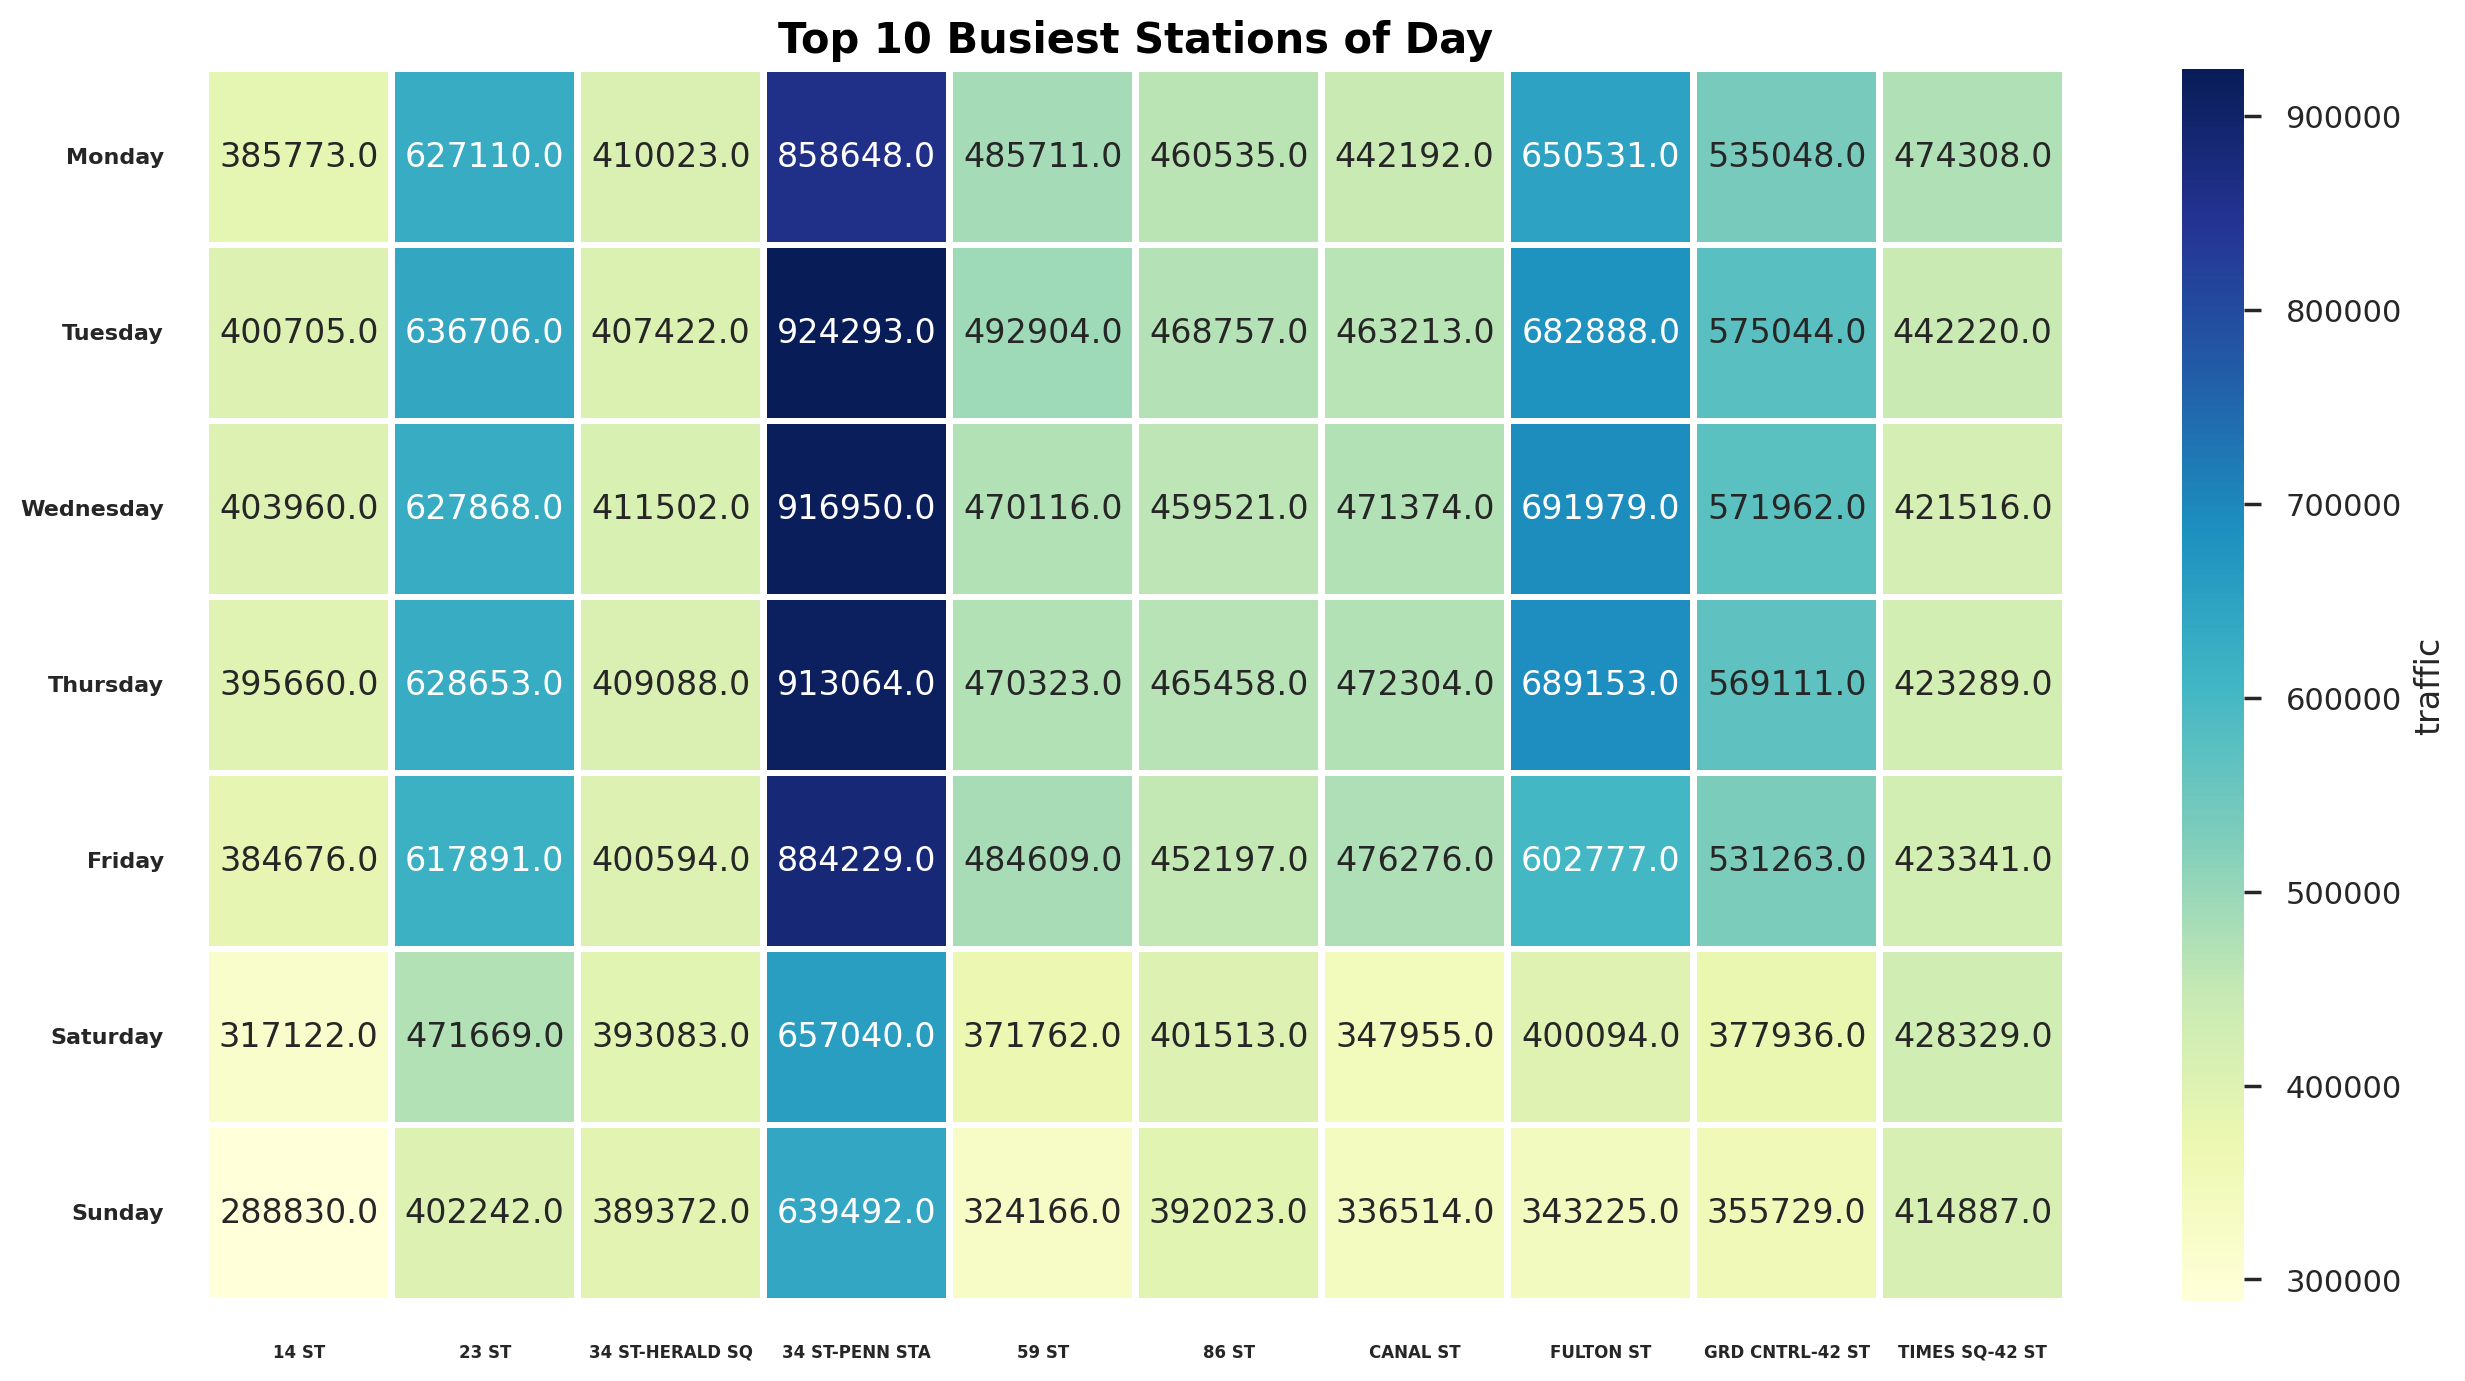

In [ ]:
plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=1)
sns.heatmap(mta_top10_heatmap,annot=True,fmt=".1f", linewidths=2, cmap="YlGnBu",cbar_kws={'label': 'traffic'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=8)
plt.xticks(weight="bold",rotation=0,size=6)
plt.title("Top 10 Busiest Stations of Day",weight="bold",c="Black", fontsize=15)
plt.show()


#Daily total traffic for top 10 stations in Heatmap

In [ ]:
#Calculating busiest time
mta_time = mta.sort_values(["station","turnstile","datetime"]).reset_index()
mta_time_group = mta_time.groupby(["turnstile"])

mta_time["dif_entries"] = mta_time_group["entries"].transform(pd.Series.diff)
mta_time["dif_exits"] = mta_time_group["exits"].transform(pd.Series.diff)

mta_time.head(10)

,index,ca,unit,scp,station,date,time,desc,entries,exits,datetime,day,turnstile,day_date,dif_entries,dif_exits
0,32900,H007,R248,00-00-00,1 AV,11/27/2021,03:00:00,REGULAR,15673694,18260340,2021-11-27 03:00:00,Saturday,1 AV-H007-R248-00-00-00,2021-11-27_Saturday,NaN,NaN
1,32901,H007,R248,00-00-00,1 AV,11/27/2021,07:00:00,REGULAR,15673702,18260434,2021-11-27 07:00:00,Saturday,1 AV-H007-R248-00-00-00,2021-11-27_Saturday,8.0,94.0
2,32902,H007,R248,00-00-00,1 AV,11/27/2021,11:00:00,REGULAR,15673731,18260734,2021-11-27 11:00:00,Saturday,1 AV-H007-R248-00-00-00,2021-11-27_Saturday,29.0,300.0
3,32903,H007,R248,00-00-00,1 AV,11/27/2021,15:00:00,REGULAR,15673824,18261201,2021-11-27 15:00:00,Saturday,1 AV-H007-R248-00-00-00,2021-11-27_Saturday,93.0,467.0
4,32904,H007,R248,00-00-00,1 AV,11/27/2021,19:00:00,REGULAR,15673945,18261707,2021-11-27 19:00:00,Saturday,1 AV-H007-R248-00-00-00,2021-11-27_Saturday,121.0,506.0
5,32905,H007,R248,00-00-00,1 AV,11/27/2021,23:00:00,REGULAR,15674071,18262023,2021-11-27 23:00:00,Saturday,1 AV-H007-R248-00-00-00,2021-11-27_Saturday,126.0,316.0
6,32906,H007,R248,00-00-00,1 AV,11/28/2021,03:00:00,REGULAR,15674102,18262179,2021-11-28 03:00:00,Sunday,1 AV-H007-R248-00-00-00,2021-11-28_Sunday,31.0,156.0
7,32907,H007,R248,00-00-00,1 AV,11/28/2021,07:00:00,REGULAR,15674107,18262270,2021-11-28 07:00:00,Sunday,1 AV-H007-R248-00-00-00,2021-11-28_Sunday,5.0,91.0
8,32908,H007,R248,00-00-00,1 AV,11/28/2021,11:00:00,REGULAR,15674130,18262479,2021-11-28 11:00:00,Sunday,1 AV-H007-R248-00-00-00,2021-11-28_Sunday,23.0,209.0
9,32909,H007,R248,00-00-00,1 AV,11/28/2021,15:00:00,REGULAR,15674196,18262958,2021-11-28 15:00:00,Sunday,1 AV-H007-R248-00-00-00,2021-11-28_Sunday,66.0,479.0


In [ ]:
print("Negative values for DIF_ENTRIES column: ")
print(len(mta_time[mta_time["dif_entries"]<0]))
print("Negative values for DIF_EXITS column:")
print(len(mta_time[mta_time["dif_exits"]<0]))

Negative values for DIF_ENTRIES column: 
24228
Negative values for DIF_EXITS column:
15330


In [ ]:
#Setting new values (median) for negative and higher than quantile (0.95)

mta_time["dif_entries"] = mta_time["dif_entries"].fillna(0)
mta_time["dif_exits"] = mta_time["dif_exits"].fillna(0)
mta_time['dif_entries'][mta_time['dif_entries'] < 0] = (mta_time["dif_entries"].median())
mta_time['dif_exits'][mta_time['dif_exits'] < 0] = (mta_time["dif_exits"].median())
mta_time['dif_entries'][mta_time['dif_entries'] > (mta_time["dif_entries"].quantile(0.95))] = (mta_time["dif_entries"].median()) 
mta_time['dif_exits'][mta_time['dif_exits'] > (mta_time["dif_exits"].quantile(0.95))] = (mta_time["dif_exits"].median()) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

In [ ]:
#Calculating TRAFFIC column DIF_ENTRIES + DIF_EXITS
mta_time["traffic"] = mta_time["dif_entries"] + mta_time["dif_exits"]
mta_time.head(5)

,index,ca,unit,scp,station,date,time,desc,entries,exits,datetime,day,turnstile,day_date,dif_entries,dif_exits,traffic
0,32900,H007,R248,00-00-00,1 AV,11/27/2021,03:00:00,REGULAR,15673694,18260340,2021-11-27 03:00:00,Saturday,1 AV-H007-R248-00-00-00,2021-11-27_Saturday,0.0,0.0,0.0
1,32901,H007,R248,00-00-00,1 AV,11/27/2021,07:00:00,REGULAR,15673702,18260434,2021-11-27 07:00:00,Saturday,1 AV-H007-R248-00-00-00,2021-11-27_Saturday,8.0,94.0,102.0
2,32902,H007,R248,00-00-00,1 AV,11/27/2021,11:00:00,REGULAR,15673731,18260734,2021-11-27 11:00:00,Saturday,1 AV-H007-R248-00-00-00,2021-11-27_Saturday,29.0,24.0,53.0
3,32903,H007,R248,00-00-00,1 AV,11/27/2021,15:00:00,REGULAR,15673824,18261201,2021-11-27 15:00:00,Saturday,1 AV-H007-R248-00-00-00,2021-11-27_Saturday,93.0,24.0,117.0
4,32904,H007,R248,00-00-00,1 AV,11/27/2021,19:00:00,REGULAR,15673945,18261707,2021-11-27 19:00:00,Saturday,1 AV-H007-R248-00-00-00,2021-11-27_Saturday,121.0,24.0,145.0


In [ ]:
mta_time.groupby(["station"]).sum().sort_values("traffic", ascending=False).head(7)


,index,entries,exits,dif_entries,dif_exits,traffic
station,,,,,,
34 ST-PENN STA,5215840789,2532486854728,2834377739097,2488528.0,3293602.0,5782130.0
23 ST,3874488145,3145126131974,3168343086233,1765031.0,2349189.0,4114220.0
GRD CNTRL-42 ST,8361005980,1181470864845,1030852262937,1576494.0,2221453.0,3797947.0
FULTON ST,4799163649,3742656743744,3070073695354,1592779.0,2134569.0,3727348.0
86 ST,3870751215,195554179072,204345023087,1695910.0,1946638.0,3642548.0
34 ST-HERALD SQ,2138333386,1175607697060,1592825364740,1418389.0,2029924.0,3448313.0
TIMES SQ-42 ST,3026654121,3033660370678,2408144007838,1505079.0,1869782.0,3374861.0


In [ ]:
mta_time_a=mta_time[mta_time["station"]=="34 ST-PENN STA"]
stations_day_time = mta_time_a[['station', 'time', 'day','traffic']]
stations_day_time_group = stations_day_time.groupby(['station','day','time'], as_index=False)
stations_day_time_group = stations_day_time_group[['traffic']].sum()
stations_day_time_group['time'] = pd.to_datetime(stations_day_time_group['time'], format='%H:%M:%S')
rounded_day_time = stations_day_time_group.set_index('time').groupby(['station','day'])
rounded_day_time = rounded_day_time.resample("4H").sum()
rounded_day_time = rounded_day_time.reset_index()
rounded_day_time.head(6)

,station,day,time,traffic
0,34 ST-PENN STA,Friday,1900-01-01 00:00:00,59358.0
1,34 ST-PENN STA,Friday,1900-01-01 04:00:00,65956.0
2,34 ST-PENN STA,Friday,1900-01-01 08:00:00,177922.0
3,34 ST-PENN STA,Friday,1900-01-01 12:00:00,201933.0
4,34 ST-PENN STA,Friday,1900-01-01 16:00:00,224847.0
5,34 ST-PENN STA,Friday,1900-01-01 20:00:00,168364.0


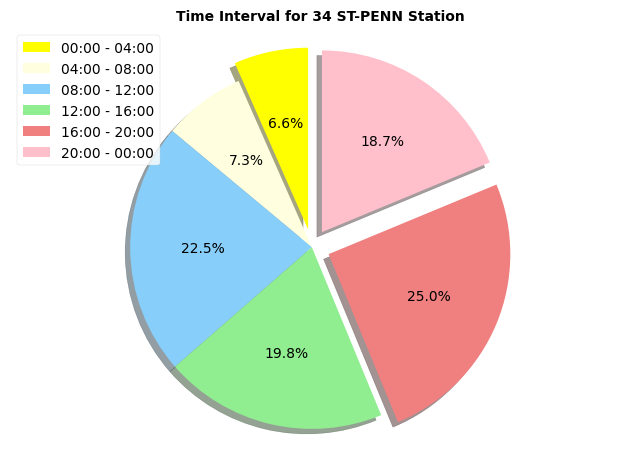

In [ ]:
plt.style.use('seaborn-notebook')
fig1, ax1 = plt.subplots()
time = '00:00 - 04:00', '04:00 - 08:00', '08:00 - 12:00', '12:00 - 16:00','16:00 - 20:00','20:00 - 00:00'
traffic = [59358, 65956, 201933, 177922, 224847 ,168364]
colors_list = ['yellow','lightyellow', 'lightskyblue', 'lightgreen','lightcoral', 'pink']
explode = (0.1, 0, 0, 0, 0.1 ,0.1)  
ax1.pie(traffic, explode=explode,  autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colors_list)
plt.title("Time Interval for 34 ST-PENN Station", weight="bold", c="Black", fontsize=10)
plt.axis('equal') 
plt.legend(labels=time, loc='upper left') 
plt.show()

In [ ]:
rounded_day_time.head(10).sort_values("traffic", ascending = False)


,station,day,time,traffic
4,34 ST-PENN STA,Friday,1900-01-01 16:00:00,224847.0
3,34 ST-PENN STA,Friday,1900-01-01 12:00:00,201933.0
9,34 ST-PENN STA,Monday,1900-01-01 12:00:00,188879.0
2,34 ST-PENN STA,Friday,1900-01-01 08:00:00,177922.0
8,34 ST-PENN STA,Monday,1900-01-01 08:00:00,174503.0
5,34 ST-PENN STA,Friday,1900-01-01 20:00:00,168364.0
1,34 ST-PENN STA,Friday,1900-01-01 04:00:00,65956.0
7,34 ST-PENN STA,Monday,1900-01-01 04:00:00,65211.0
0,34 ST-PENN STA,Friday,1900-01-01 00:00:00,59358.0
6,34 ST-PENN STA,Monday,1900-01-01 00:00:00,41746.0


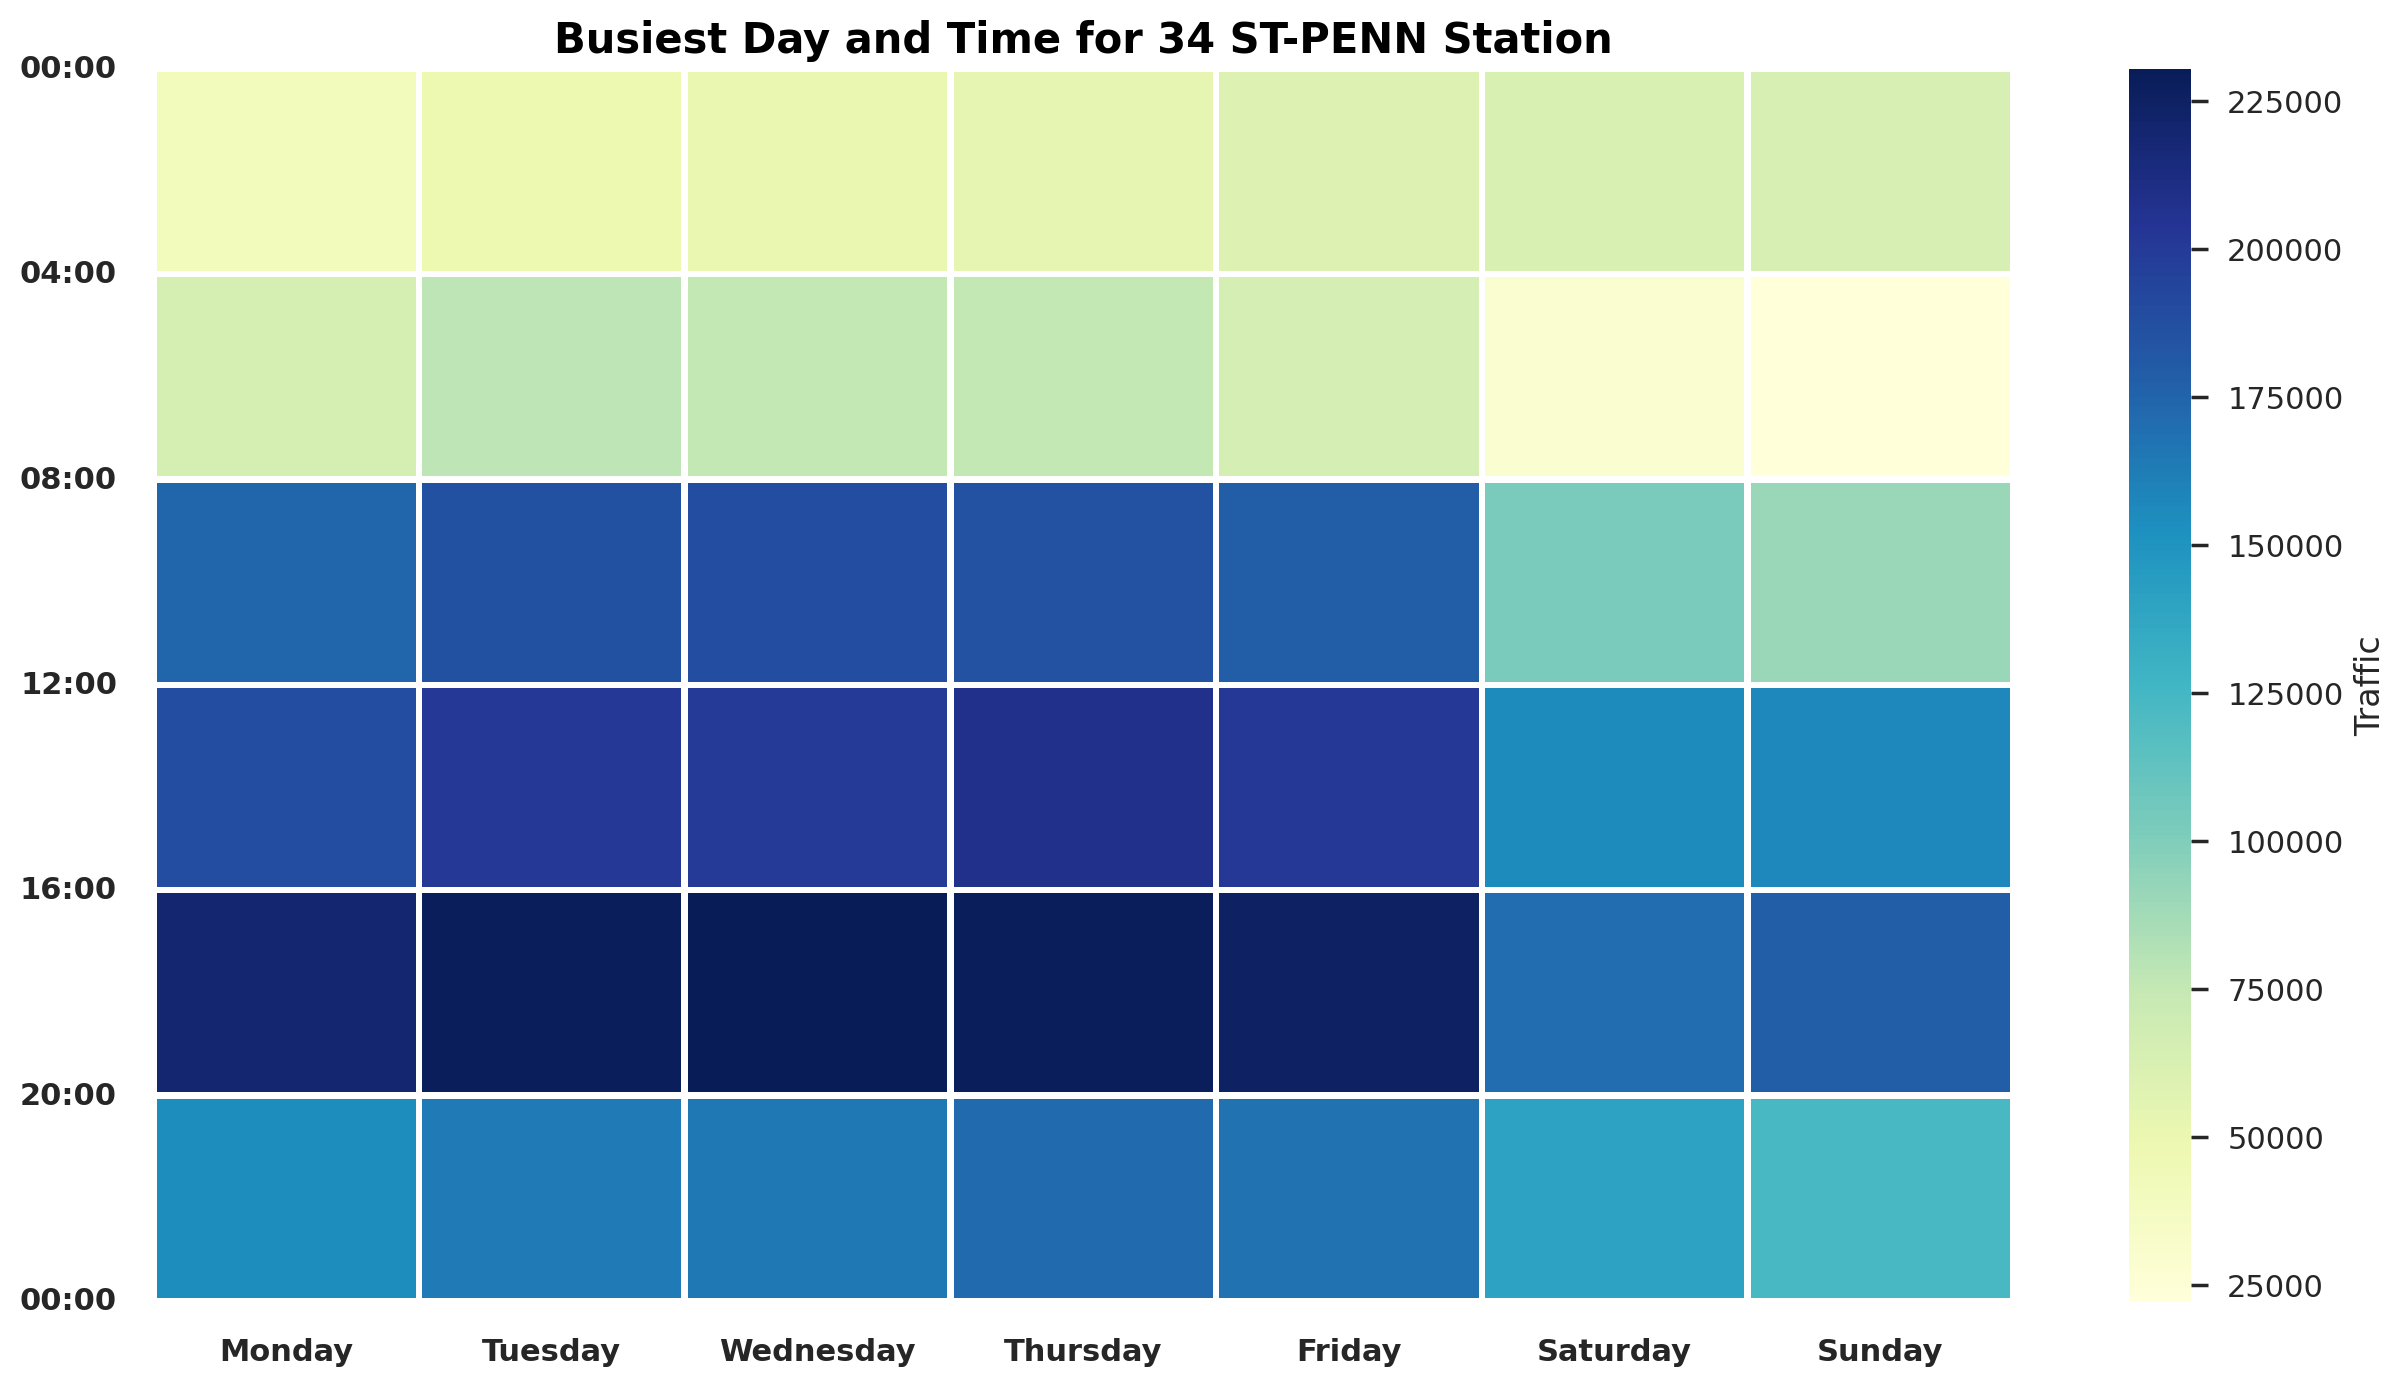

In [ ]:
#Creating Pivot table for heatmap

mta_top1_heatmap_detail = rounded_day_time.groupby(["day","time"])
mta_top1_heatmap_detail = mta_top1_heatmap_detail["traffic"].mean().reset_index()

mta_top1_heatmap_detail = rounded_day_time.pivot(index="time", columns="day",values="traffic")
mta_top1_heatmap_detail = mta_top1_heatmap_detail[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]

#Heatmap for top7 stations per day

plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=1)
sns.heatmap(mta_top1_heatmap_detail,annot=False, linewidths=2, cmap="YlGnBu",cbar_kws={'label': 'Traffic'})
plt.style.use('seaborn-talk')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0)
plt.yticks([0,1,2,3,4,5,6],["00:00","04:00","08:00","12:00","16:00","20:00","00:00"])
plt.xticks(weight="bold",rotation=0)
plt.title("Busiest Day and Time for 34 ST-PENN Station",weight="bold",c="black", fontsize=15)
ax.xaxis.get_majorticklabels()[2].set_x(-.5)
plt.show()